## Neural_Networks

### Step 1: Import required packages

In [0]:
import tensorflow as tf
import os
import numpy as np
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt
%reload_ext tensorboard
import pandas.util.testing as tm

In [3]:
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.0-tf


## Mount the Google Drive to access the Digit MNIST Dataset

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Step 2: Dataset Preparation

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [7]:
#Utility function to load the data set into train and test
train_images,train_labels = load_mnist('/content/gdrive/My Drive/Assignment/Data/digit', kind='train')
test_images, test_labels = load_mnist('/content/gdrive/My Drive/Assignment/Data/digit', kind='t10k')

print(train_images.shape)
print(train_images.dtype)
print(test_images.shape)
print(test_images.dtype)


(60000, 784)
uint8
(10000, 784)
uint8


In [8]:
#Reshaping the Data to 28x28 for HOG Features 
train_images=train_images.reshape(-1,28,28)
test_images=test_images.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(train_images)))
print("Test dataset after reshaping :{}".format(np.shape(test_images)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


9


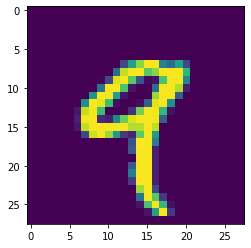

In [0]:
## Show an image from theh dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[4])
print(train_labels[4])

### Step 3: Normalize the dataset and split the small part of the training set into validation set

In [0]:
#Validation set: first 5000 samples
#Training set: 5000 to remaining

valid_images = train_images[:5000] / 255.0
valid_labels = train_labels[:5000]


train_images = train_images[5000:] / 255.0
train_labels = train_labels[5000:]

## Normalize the test images 
test_images = test_images / 255.0

In [10]:
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


### Step 4: Design the model

In [0]:
#Creating model using Adam
model_adam = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### Step 5: Training the model

In [0]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))


Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2542 - accuracy: 0.7010 - val_loss: 0.6523 - val_accuracy: 0.8438
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5246 - accuracy: 0.8645 - val_loss: 0.4461 - val_accuracy: 0.8856
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4065 - accuracy: 0.8897 - val_loss: 0.3823 - val_accuracy: 0.8948
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3587 - accuracy: 0.8999 - val_loss: 0.3541 - val_accuracy: 0.8998
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3320 - accuracy: 0.9061 - val_loss: 0.3340 - val_accuracy: 0.9064
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3144 - accuracy: 0.9103 - val_loss: 0.3204 - val_accuracy: 0.9096
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3012 - accuracy: 0.9132 - val_loss: 0.3068 - val_accuracy:

In [13]:
#Final model used in Adam optimization 
#model trained with epochs=20 

model_adam.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model_adam.fit(train_images, train_labels, epochs=20,validation_data=(valid_images, valid_labels))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9215 - val_loss: 0.1488 - val_accuracy: 0.9574
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9626 - val_loss: 0.1071 - val_accuracy: 0.9676
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9739 - val_loss: 0.0935 - val_accuracy: 0.9714
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0791 - val_accuracy: 0.9768
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0767 - val_accuracy: 0.9770
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0757 - val_accuracy: 0.9802
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0725 - val_accuracy:

### Why do we use validation dataset ? 

In [14]:
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Training model using SGD optimizer 

In [0]:
#Creating model using SGD and training it with epochs = 30 and SGD(0.1)
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H1=model1.fit(train_images, train_labels, epochs=30,validation_data=(valid_images, valid_labels))

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3008 - accuracy: 0.1120 - val_loss: 2.2980 - val_accuracy: 0.1128
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2987 - accuracy: 0.1186 - val_loss: 2.2964 - val_accuracy: 0.1128
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2949 - accuracy: 0.1285 - val_loss: 2.2909 - val_accuracy: 0.1078
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2888 - accuracy: 0.1427 - val_loss: 2.2870 - val_accuracy: 0.1026
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2792 - accuracy: 0.1668 - val_loss: 2.2714 - val_accuracy: 0.1576
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2613 - accuracy: 0.2042 - val_loss: 2.2455 - val_accuracy: 0.3052
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2309 - accuracy: 0.2553 - val_loss: 2.2124 - val_accuracy:

In [15]:
#Creating model using SGD and training it with epochs = 10 
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

H1=model1.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6792 - accuracy: 0.8260 - val_loss: 0.3681 - val_accuracy: 0.9020
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3479 - accuracy: 0.9029 - val_loss: 0.2961 - val_accuracy: 0.9176
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.9153 - val_loss: 0.2641 - val_accuracy: 0.9262
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9245 - val_loss: 0.2375 - val_accuracy: 0.9324
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2439 - accuracy: 0.9313 - val_loss: 0.2194 - val_accuracy: 0.9388
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2256 - accuracy: 0.9366 - val_loss: 0.2034 - val_accuracy: 0.9418
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2103 - accuracy: 0.9409 - val_loss: 0.1939 - val_accuracy:

**Summary of the model using Adam optimizer**

In [0]:
model_adam.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


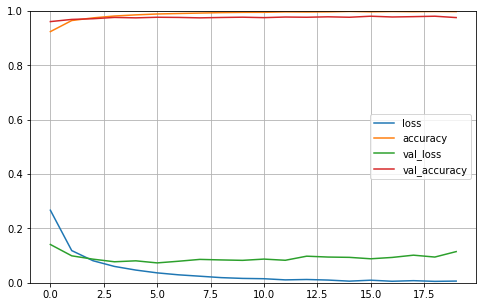

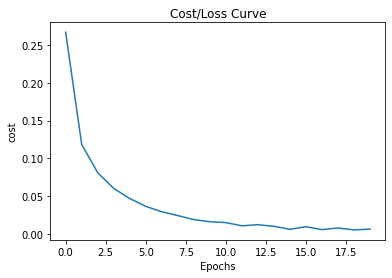

In [0]:
## Plot the learning curves for Adam optimizer with epochs = 20 and Adam()
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

**Summary of the model using SGD optimizer**

In [0]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


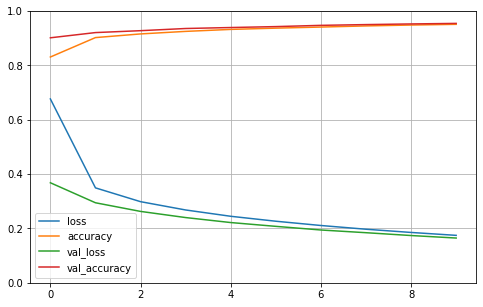

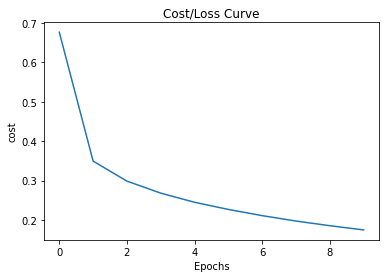

In [0]:
## Plot the learning curves for SGD Optimizer with epochs = 90 and SGD(0.1)
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H1.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

### Step 6: Evaluation on test dataset

In [16]:
## Evaluation of model's performance on test dataset using Adam optimizer.
model_adam.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9757


[0.12872137129306793, 0.9757000207901001]

In [17]:
## Evaluation of model's performance on test dataset using SGD optimizer.
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.9513


[0.1682877391576767, 0.9513000249862671]

### Step 7: Plotting Confusion Matrix for Raw Input  

In [18]:
#Since evaluate function cannot be used for plotting confusion matrix we use predict_classes function
#prediction output using Adam optimizer 

pred_A = model_adam.predict_classes(test_images)
accuracy_A = metrics.accuracy_score(test_labels, pred_A)
print("Accuracy on the test dataset Raw Input using Adam optimizer:", accuracy_A *100)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on the test dataset Raw Input using Adam optimizer: 97.57000000000001


[[ 973    0    0    1    1    0    1    1    3    0]
 [   0 1116    2    2    0    2    3    1    9    0]
 [   4    4  983    6    3    0    2    6   22    2]
 [   1    0    2  996    0    3    0    1    5    2]
 [   1    0    2    1  955    0    4    3    3   13]
 [   3    0    0   12    1  866    3    1    6    0]
 [   4    1    1    2    2    6  937    0    5    0]
 [   1    4    5    6    0    0    0 1002    5    5]
 [   4    0    1    7    1    3    1    2  953    2]
 [   2    3    0    6    6    3    1    5    7  976]]


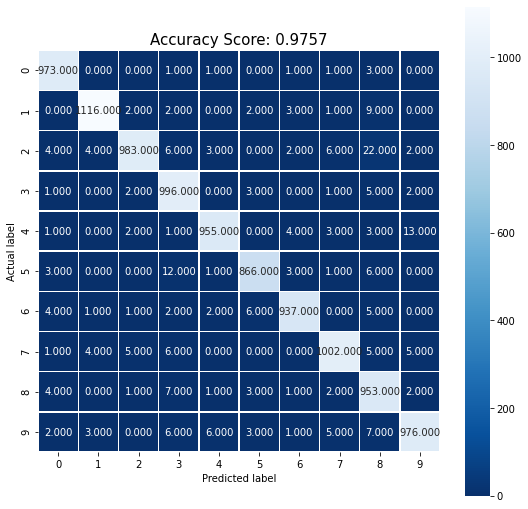

In [21]:
cm_Adam = metrics.confusion_matrix(test_labels, pred_A)
print(cm_Adam)

# Ploting confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm_Adam, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_A)
plt.title(all_sample_title, size = 15);

In [22]:
#Since evaluate function cannot be used for plotting confusion matrix we use predict_classes function
#prediction output using SGD optimizer 

pred_SGD = model1.predict_classes(test_images)
accuracy_SGD = metrics.accuracy_score(test_labels, pred_SGD)
print("Accuracy on the test dataset Raw Input using SGD optimizer:", accuracy_SGD *100)

Accuracy on the test dataset Raw Input using SGD optimizer: 95.13000000000001


[[ 967    0    2    1    0    3    4    2    1    0]
 [   0 1116    5    1    0    1    3    2    7    0]
 [   8    2  972   10    8    2    5   10   13    2]
 [   1    1   11  956    1   11    0   12   11    6]
 [   1    0    7    1  935    0    7    4    3   24]
 [   9    2    1   25    3  818   11    1   14    8]
 [  10    3    3    2    9    7  918    2    4    0]
 [   2   12   17    7    6    1    0  964    1   18]
 [   5    3    4   14    8    6    8    9  911    6]
 [   9    6    1   13   22    2    1    7    5  943]]


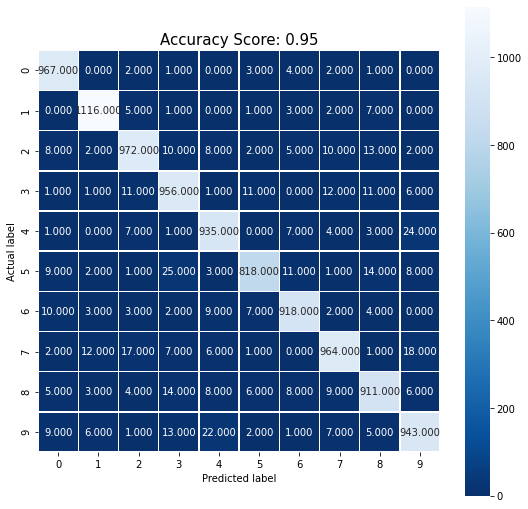

In [0]:
cm_SGD= metrics.confusion_matrix(test_labels, pred_SGD)
print(cm_SGD)

# Ploting confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm_SGD, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_SGD)
plt.title(all_sample_title, size = 15);

### Step 7: Visualization of results

The Label for output image in Test set: 1
Predicted output for Adam: 1
Predicted output for SGD: 1
The Label for output image in Test set: 9
Predicted output for Adam: 9
Predicted output for SGD: 9
The Label for output image in Test set: 2
Predicted output for Adam: 2
Predicted output for SGD: 2


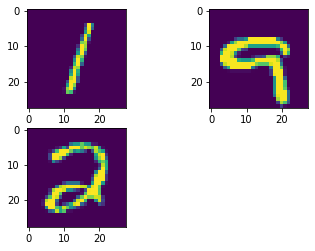

In [40]:
fig = plt.figure()


image_index = 2
ax1 = fig.add_subplot(2,2,1)
plt.imshow(test_images[2])
print("The Label for output image in Test set:",test_labels[image_index])
print("Predicted output for Adam:",pred_A[2])
print("Predicted output for SGD:",pred_SGD[2])

image_index = 2929
ax2 = fig.add_subplot(2,2,2)
plt.imshow(test_images[2929])
print("The Label for output image in Test set:",test_labels[image_index])
print("Predicted output for Adam:",pred_A[2929])
print("Predicted output for SGD:",pred_SGD[2929])


image_index = 106
ax3 = fig.add_subplot(2,2,3)
plt.imshow(test_images[106])
print("The Label for output image in Test set:",test_labels[image_index])
print("Predicted output for Adam:",pred_A[106])
print("Predicted output for SGD:",pred_SGD[106])
